In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("seaborn-v0_8")


In [4]:
df = pd.read_csv("../data/synthetic/transactions.csv")
df.head()


,transaction_id,user_id,merchant_id,amount,channel,location,timestamp,device_change,geo_distance,fraud_type,fraud_strategy_version,is_fraud
0,761,920,165,541.440000,netbanking,semi-urban,2024-01-01 00:00:10,0,4.89,none,0,0
1,25279,87,104,22.191805,netbanking,rural,2024-01-01 00:00:50,0,4.56,card_testing,1,1
2,47507,456,89,42.900000,card,semi-urban,2024-01-01 00:01:06,0,3.66,none,0,0
3,26827,336,16,61.540000,upi,rural,2024-01-01 00:01:24,0,5.80,none,0,0
4,30976,8,83,3.380000,netbanking,semi-urban,2024-01-01 00:05:19,0,3.42,none,0,0


In [5]:
df.info()


<class 'pandas.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          50000 non-null  int64  
 1   user_id                 50000 non-null  int64  
 2   merchant_id             50000 non-null  int64  
 3   amount                  50000 non-null  float64
 4   channel                 50000 non-null  str    
 5   location                50000 non-null  str    
 6   timestamp               50000 non-null  str    
 7   device_change           50000 non-null  int64  
 8   geo_distance            50000 non-null  float64
 9   fraud_type              50000 non-null  str    
 10  fraud_strategy_version  50000 non-null  int64  
 11  is_fraud                50000 non-null  int64  
dtypes: float64(2), int64(6), str(4)
memory usage: 4.6 MB


In [6]:
df["timestamp"] = pd.to_datetime(df["timestamp"])


In [7]:
df["is_fraud"].value_counts(normalize=True)


is_fraud
0    0.97
1    0.03
Name: proportion, dtype: float64

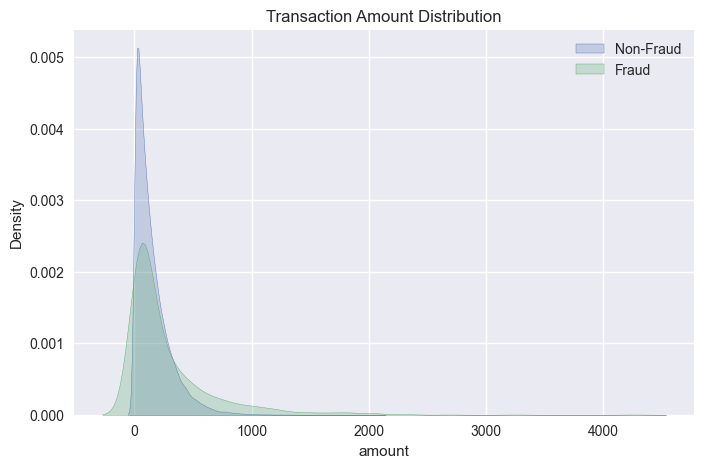

In [8]:
plt.figure(figsize=(8,5))
sns.kdeplot(
    df[df["is_fraud"] == 0]["amount"],
    label="Non-Fraud",
    fill=True
)
sns.kdeplot(
    df[df["is_fraud"] == 1]["amount"],
    label="Fraud",
    fill=True
)
plt.title("Transaction Amount Distribution")
plt.legend()
plt.show()


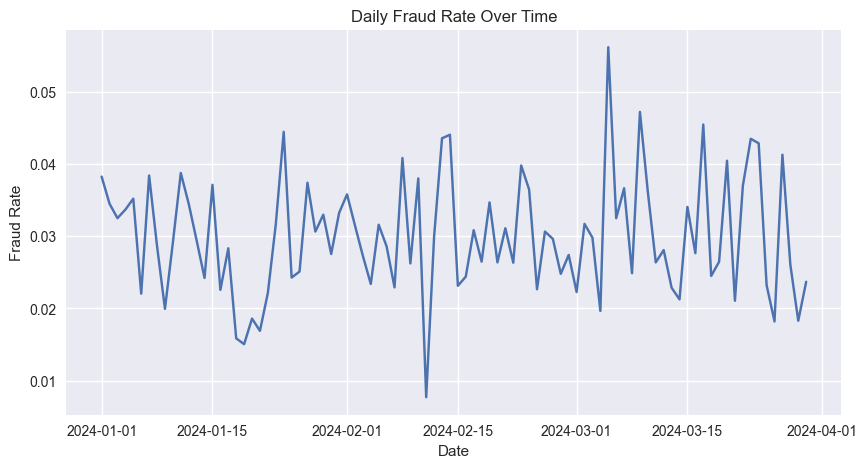

In [9]:
df["date"] = df["timestamp"].dt.date

daily_fraud_rate = (
    df.groupby("date")["is_fraud"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,5))
plt.plot(daily_fraud_rate["date"], daily_fraud_rate["is_fraud"])
plt.title("Daily Fraud Rate Over Time")
plt.ylabel("Fraud Rate")
plt.xlabel("Date")
plt.show()


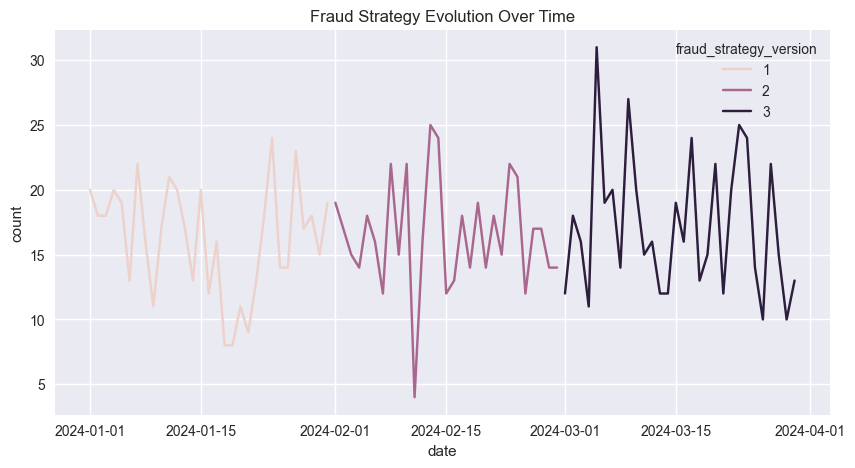

In [10]:
strategy_time = (
    df[df["is_fraud"] == 1]
    .groupby(["fraud_strategy_version", "date"])
    .size()
    .reset_index(name="count")
)

plt.figure(figsize=(10,5))
sns.lineplot(
    data=strategy_time,
    x="date",
    y="count",
    hue="fraud_strategy_version"
)
plt.title("Fraud Strategy Evolution Over Time")
plt.show()


In [11]:
pd.crosstab(
    df["device_change"],
    df["is_fraud"],
    normalize="index"
)


is_fraud,0,1
device_change,,
0,0.989715,0.010285
1,0.000000,1.000000


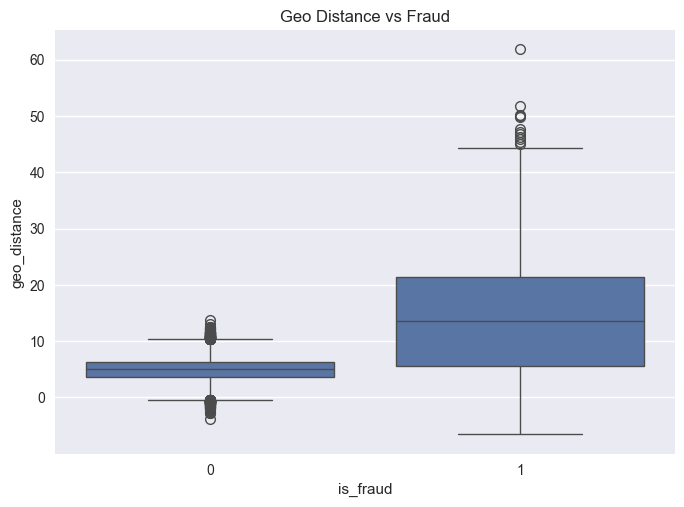

In [12]:
sns.boxplot(
    data=df,
    x="is_fraud",
    y="geo_distance"
)
plt.title("Geo Distance vs Fraud")
plt.show()


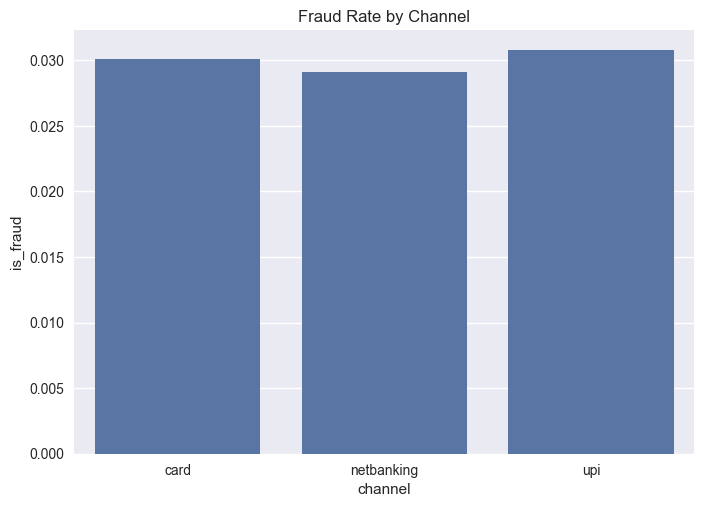

In [13]:
channel_risk = (
    df.groupby("channel")["is_fraud"]
    .mean()
    .reset_index()
)

sns.barplot(data=channel_risk, x="channel", y="is_fraud")
plt.title("Fraud Rate by Channel")
plt.show()
